In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
    



from pathlib import Path
import numpy as np
import gzip
import matplotlib.pyplot as plt
import cv2
from skimage.feature import blob_log
import unet
import utils
%matplotlib inline

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
load_pred = utils.load_pred

def show(x, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(x)

In [3]:
pred = load_pred('../_runs/unet-contrast-100-savepred/107-7.03125-pred.npy')
img = utils.load_image(Path('../data/Train/107.png'.format(101)), cache=False)

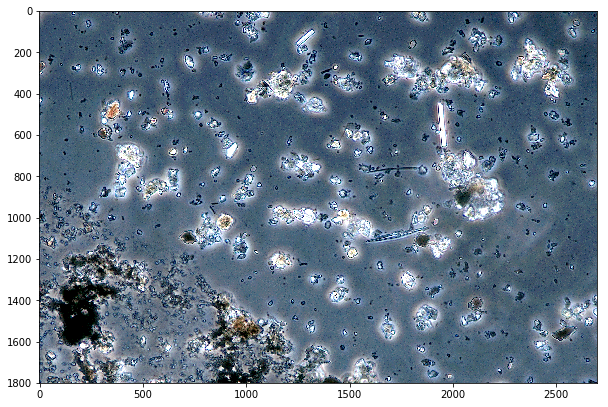

In [4]:
show(img[:,:])

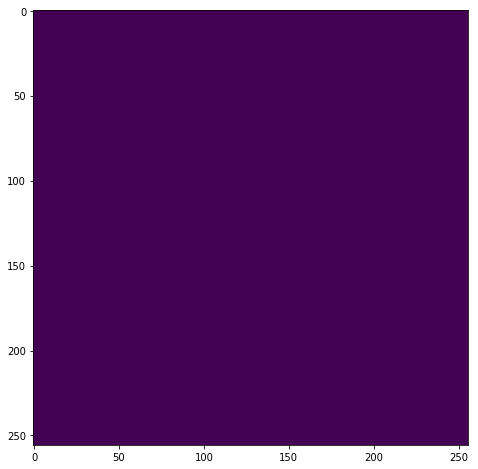

In [5]:
pred_patch = pred[:, :,:]
for cls in range(utils.N_CLASSES):
    show(pred_patch[cls])

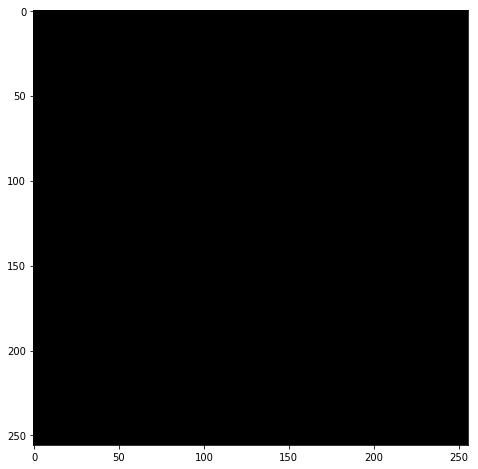

In [6]:
colored_pred = unet.colored_prediction(pred)
colored_patch = colored_pred[:,:]
show(colored_patch)

In [7]:
def show_blobs(bg, blobs, s=1, scale=1):
    bg = bg.copy()
    for y, x, _ in blobs:
        x, y = int(np.round(x * scale)), int(np.round(y * scale))
        bg[y - s: y + s, x - s: x + s] = 1
    show(bg)

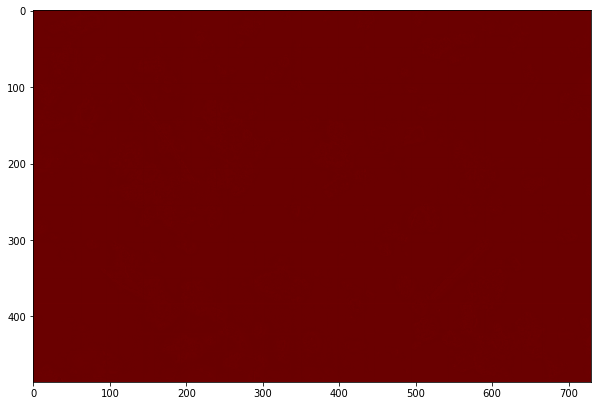

In [8]:
cls_blobs = [
    blob_log(pred_patch[cls], threshold=0.04, min_sigma=1, max_sigma=4, num_sigma=4)
    for cls in range(utils.N_CLASSES)]
show_blobs(colored_patch, [b for bs in cls_blobs for b in bs])

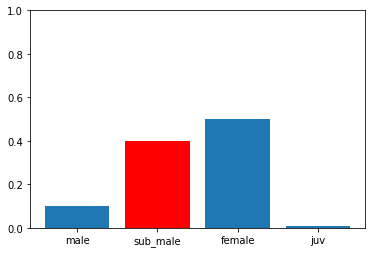

In [10]:
from matplotlib import pyplot as plt
probs = [0.1, 0.4, 0.5, 0.01]
CLS_NAMES = ['male', 'sub_male', 'female', 'juv']
xs = range(len(CLS_NAMES))
barlist = plt.bar(xs, probs)
barlist[1].set_color('r')
plt.ylim(0, 1)
plt.xticks(xs, CLS_NAMES);

In [ ]:
pd.Dat